<a href="https://colab.research.google.com/github/xu62u4u6/16S-amplicon-analysis/blob/main/%E5%85%B1%E7%8F%BE%E7%9F%A9%E9%99%A3%E8%88%87%E5%BE%AE%E7%94%9F%E7%89%A9%E7%B6%B2%E8%B7%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import module
!pip install networkx
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# read csv
ncbi_name_taxa_asv = pd.read_csv("/content/drive/MyDrive/code/bioinfo/CGH_ncbi_name_taxa_asv.csv", index_col=0)
taxa = ncbi_name_taxa_asv.iloc[:, :7]
asv = ncbi_name_taxa_asv.iloc[:, 7:]

# 將asv簡化為出現與否
occurrence = np.where(asv==0, 0, 1)

In [ ]:
# 共現矩陣 = 物種對(otu對)共同出現的次數
cooccurrence_matrix = np.dot(occurrence, occurrence.T)
relatative_cooccurrence_matrix = cooccurrence_matrix/len(asv.columns)

In [ ]:
# 將共現性矩陣中小於閾值的元素設為0
threshold = 0.7
masked_matrix = np.where(relatative_cooccurrence_matrix<threshold, 0, relatative_cooccurrence_matrix)

# 只取上三角並刪除對角線資訊(自己與自己共現)
masked_matrix = np.triu(masked_matrix, 1)

# 將不為0的對標出
edges = np.array(np.where(masked_matrix!=0)).T
edges = [(i, j) for i, j in edges]

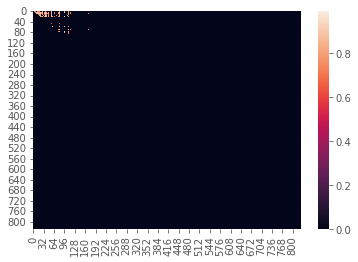

In [ ]:
# 查看heatmap
sns.heatmap(masked_matrix)

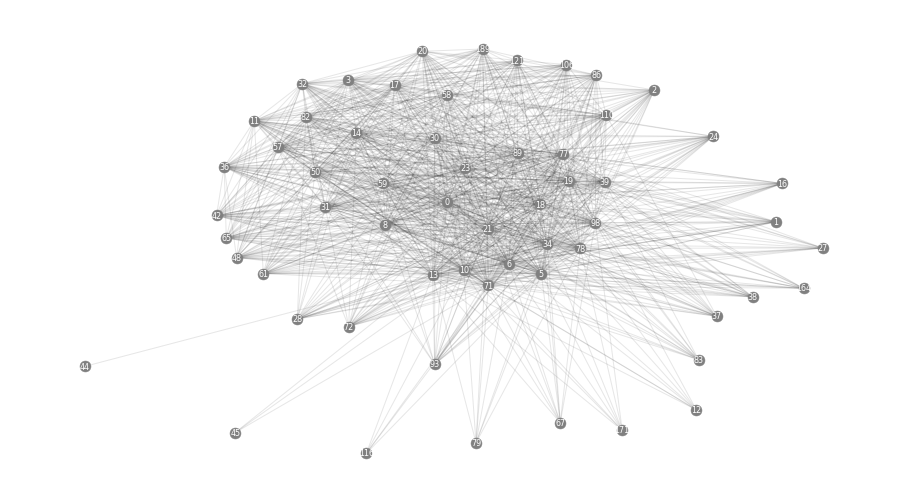

In [ ]:
import networkx as nx
plt.figure(figsize=(16, 9))

# 創建圖
G = nx.Graph()

# 將所有節點加入
G.add_nodes_from(range(len(asv.columns)))

# 將所有邊加入
G.add_edges_from(edges)

# 刪除未連接的點
G.remove_nodes_from([node for node in G.nodes() if G.degree(node) == 0])
#G.add_l
pos = nx.kamada_kawai_layout(G)

nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color="#101010", width=1)
nx.draw_networkx_nodes(G, pos, node_size=120, node_color="gray")
nx.draw_networkx_labels(G, pos, font_size=8, font_color="white")

plt.axis("off")
plt.savefig("cgh_network.jpg", dpi=800)
plt.show()


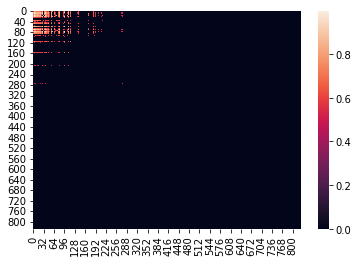

In [ ]:
sns.heatmap(masked_matrix)